# Results
Takes the output from main_program and create plots using matplotlib.

## Imports

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

## Reader functions

In [2]:
def csv_reader(filename):
    res = [] #Result (A matrix containing the data from the csv file)
    with open(filename) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        row_type = 'title'
        current = [] #The current evaluation score being read
        row_names = [] #The value of the first column in each row
        data = [] #The data values
        for row in csv_reader:
            if row_type == 'title':
                #Title name
                current.append(row[0])
                row_type = 'header'
            elif row_type == 'header':
                #Column names
                current.append(row[1:])
                row_type = None
            elif row == []:
                #End of current
                current.extend([row_names] + [data])
                res.append(current)
                row_names, data, current = [],[],[]
                row_type = 'title'
            else:
                data_row = []
                for i, val in enumerate(row):
                    if i == 0:
                        row_names.append(val)
                    else:
                        data_row.append(float(val))
                data.append(data_row)
        current.extend([row_names] + [data])
        res.append(current)
        row_names, data, current = [],[],[]
        row_type = 'title'
    return res

def select_md(res, selections = [True]*8):
    #Do not tranpose data before using this function
    assert len(selections) == 8, "Invalid selection size"
    for i,r in enumerate(res):
        fil_data = []
        fil_npcolnames = np.array(r[1])[selections]
        fil_colnames = fil_npcolnames.tolist()
        fs_data = []
        for j, data_row in enumerate(r[3]):
            fil_npdata = np.array(data_row)[selections]
            fil_data.append(fil_npdata.tolist())
        res[i][1], res[i][3] = fil_colnames, fil_data
    return res

def select_fs(res, fs_select=0, fs_count=3):
    #Do not tranpose data before using this function
    assert fs_select < fs_count, "Invalid fs_select"
    for i,r in enumerate(res):
        fs_rownames = []
        for j, nrow in enumerate(r[2]):
            if j%fs_count==fs_select:
                fs_rownames.append(nrow)
        fs_data = []
        for j, data_row in enumerate(r[3]):
            if j%fs_count==fs_select:
                fs_data.append(data_row)
        res[i][2], res[i][3] = fs_rownames, fs_data
    return res

def avg(res,swap = True):
    if swap:
        res = tp_res(res)
    for i,r in enumerate(res):
        avg_data = []
        for data_row in r[3]:
            avg_data.append([round(sum(data_row)/len(data_row),3)])
        res[i][3] = avg_data
    if swap:
        res = tp_res(res)
    return res

def tp_res(res):
    #Transpose the data
    for i,r in enumerate(res):
        s_data = np.array(r[3])
        res[i][3] = s_data.transpose().tolist()
    return res

In [3]:
#Tester
test1 = False
#test1 = False
if __name__=='__main__' and test1:
    NASA = csv_reader('NASA.csv')
    print('#Before feature selection filter')
    print(NASA[0])
    NASA = select_fs(NASA,1)
    print('#After feature selection filter')
    print(NASA[0])
    print('#Aftermodel filter')
    NASA = select_md(NASA,[True]*5+[False]*3)
    #print(len(NASA))
    #NASA = tp_res(NASA)
    print(NASA[0])

## Plot functions

In [4]:
def avg_plot2(filename, fs_count, md, fontsize=14):
    fig = plt.figure()
    for i in range(fs_count):
        res = csv_reader(filename)
        res = select_fs(res,i)
        res = select_md(res,md)
        res = avg(res)
        for j, eval_res in enumerate(res):
            title, col_names, row_names, data = eval_res
            X = np.arange(len(data[0]))
            ax = fig.add_axes([i,-j,1,1])
            ax.bar(X, data[0], color = 'cyan', width = 0.8)
            ax.set_ylim(0,1)
            if j == len(res)-1:
                ax.set_xlabel('Model name', fontsize=fontsize)
                ax.set_xticks(X)
                ax.set_xticklabels(col_names, rotation=30)
            elif j==0:
                ax.set_title(['All','CFS','RFE'][i], fontsize=fontsize*2)
    plt.show()

def avg_plot(filename, fs, md, fontsize=14):
    res = csv_reader(filename)
    res = select_fs(res,fs)
    res = select_md(res,md)
    res = avg(res)
    for eval_res in res:
        title, col_names, row_names, data = eval_res
        X = np.arange(len(data[0]))
        fig = plt.figure()
        ax = fig.add_axes([0,0,1,1])
        ax.bar(X, data[0], color = 'cyan', width = 0.8)
        #plt.xticks(X, col_names, rotation=30)
        ax.set_xticks(X)
        ax.set_xticklabels(col_names, rotation=30)
        ax.set_ylim(0,1)
        ax.set_xlabel('Model name', fontsize=fontsize)
        ax.set_ylabel('Score', fontsize=fontsize)
        ax.set_title(title, fontsize=fontsize*2)
        plt.show()

## Plots

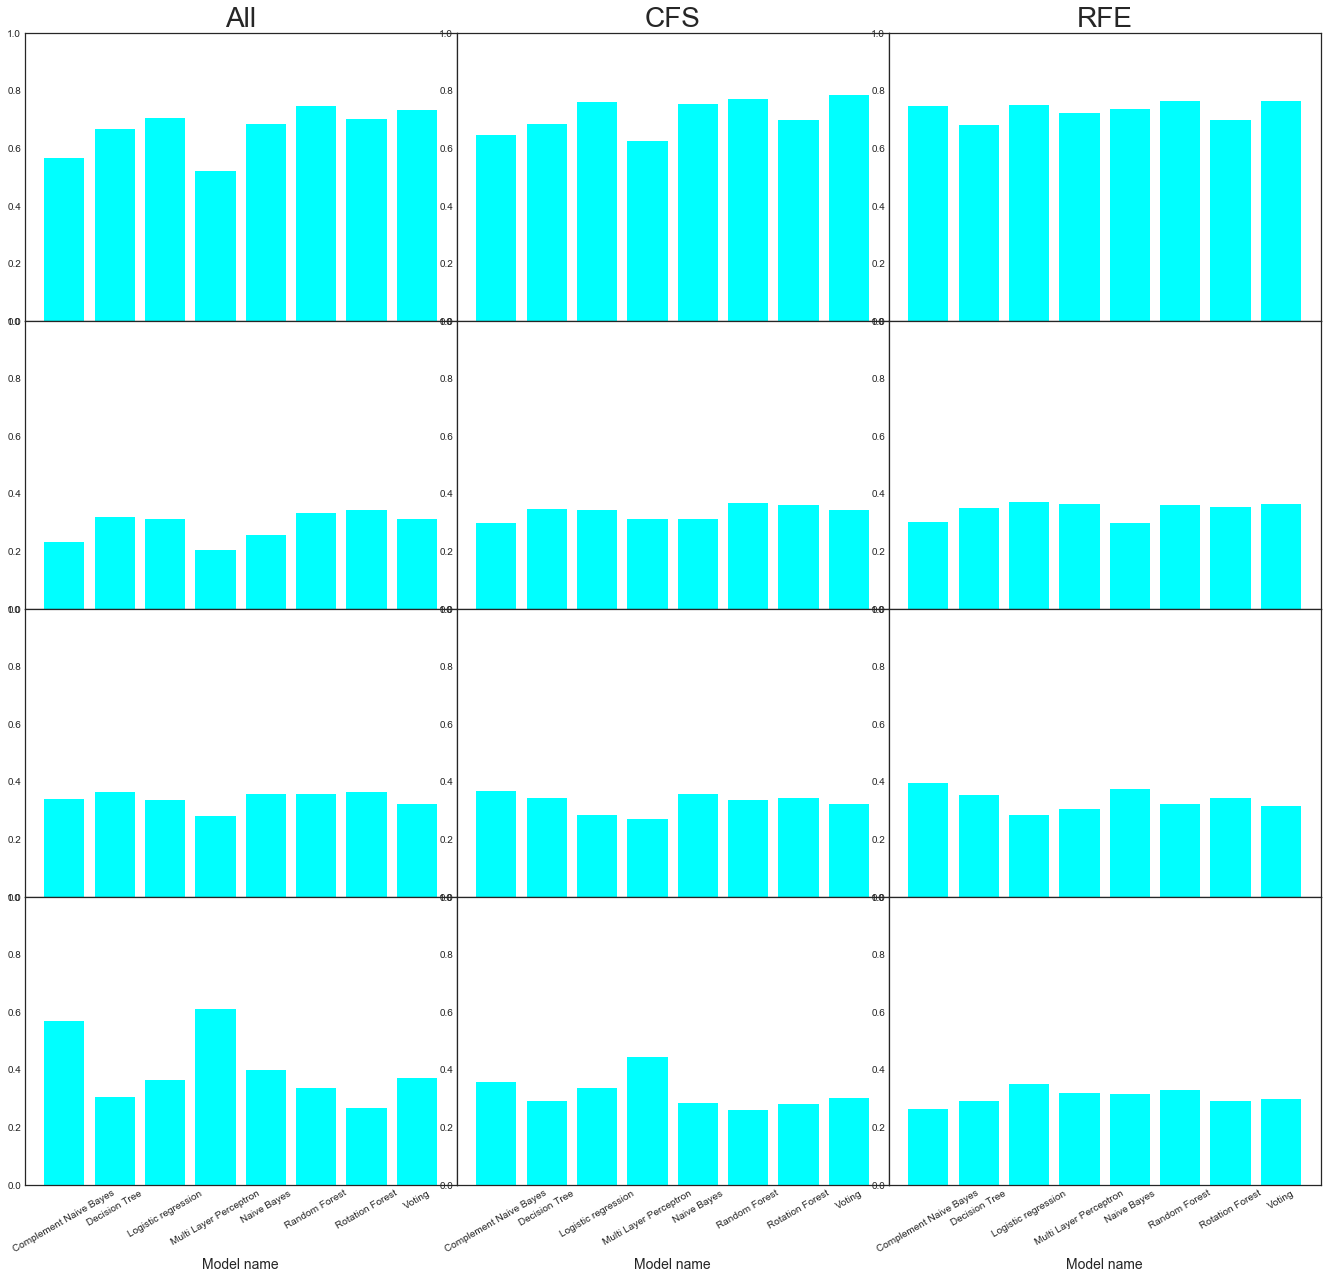

In [5]:
plt.close('all')
avg_plot2('NASA.csv',3,[True]*8)

### Plot 1: Average performance (No feature selection)
The following plots show the average performance for each model.

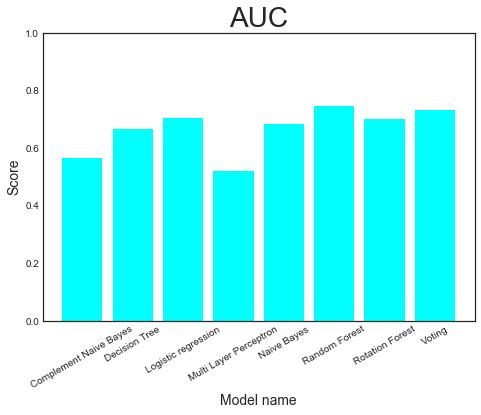

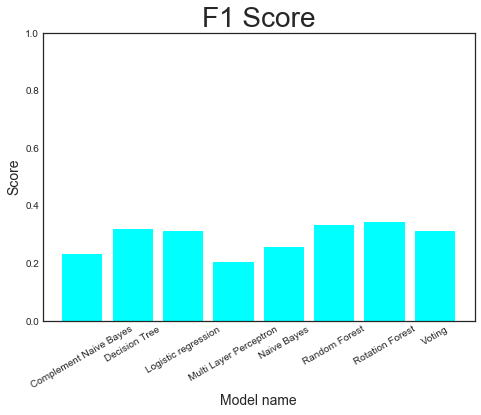

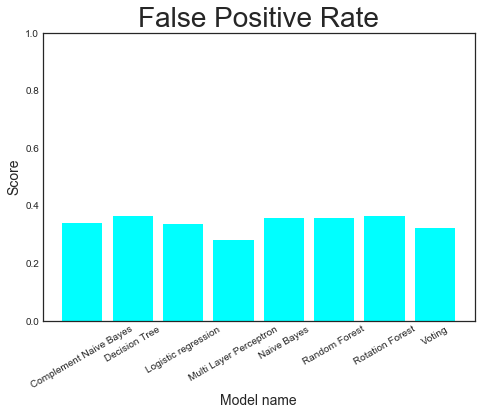

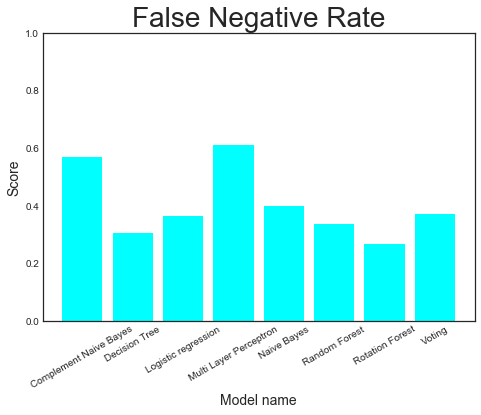

In [6]:
plt.close('all')
avg_plot('NASA.csv',0,[True]*8)

### Plot 2: Average performance (CFS)
The following plots show the average performance for each model.

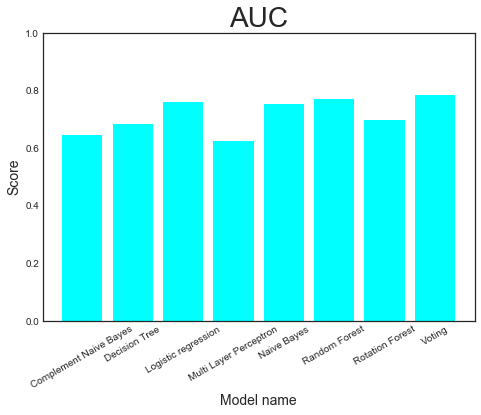

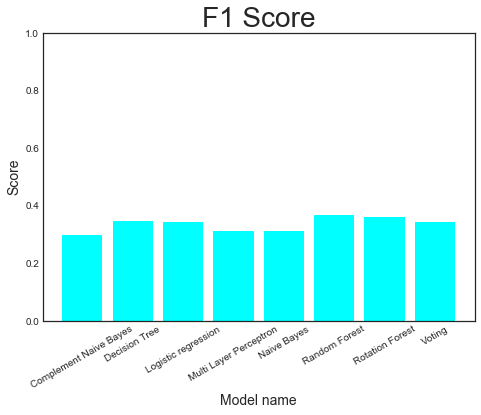

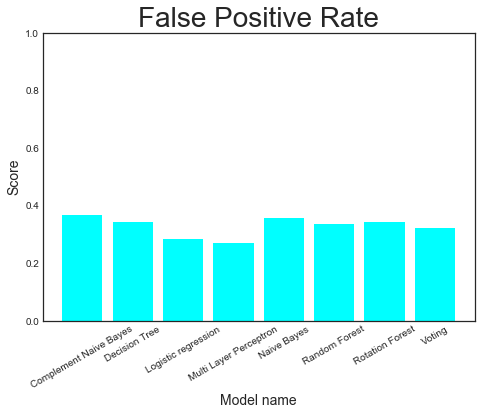

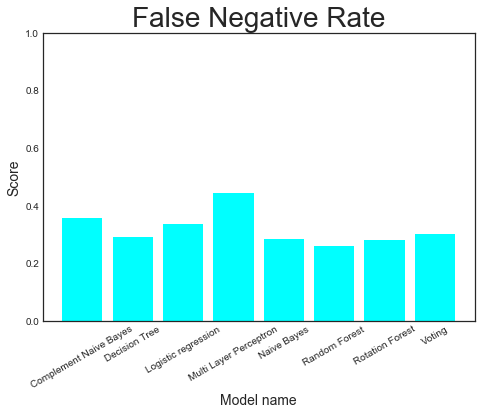

In [7]:
plt.close('all')
avg_plot('NASA.csv',1,[True]*8)

### Plot 3: Average performance (RFE)
The following plots show the average performance for each model. 

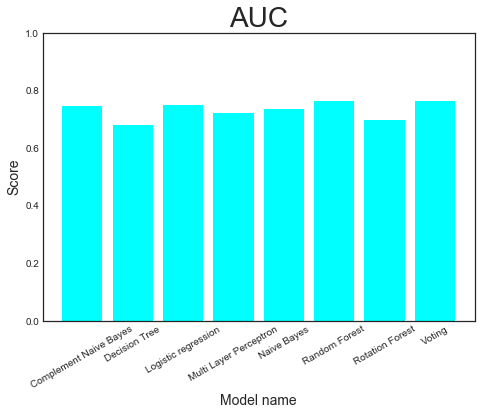

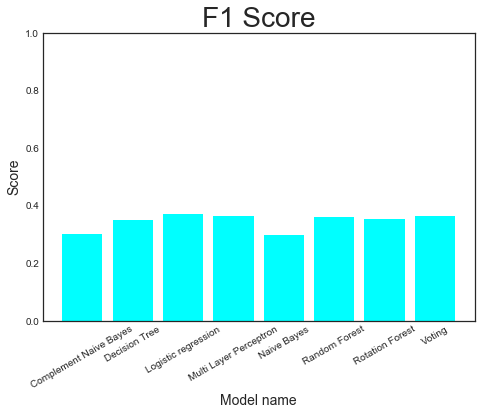

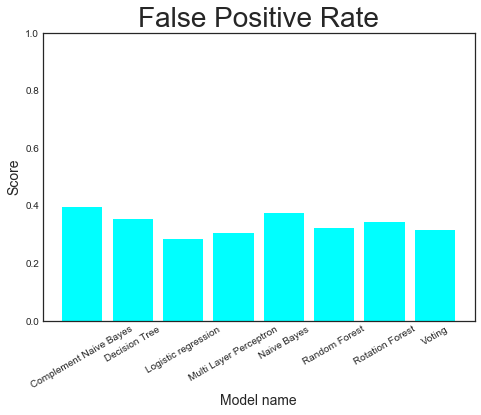

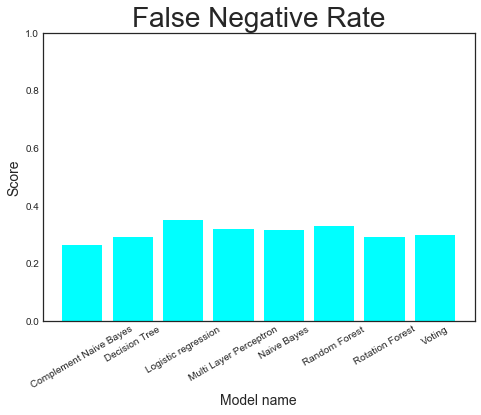

In [8]:
plt.close('all')
avg_plot('NASA.csv',2,[True]*8)